## 1. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)

EDA란? 수집한 데이터를 다양한 각도에서 관찰하고 이해하는 과정이다. 그래프나 통계적인 자료를 직관적으로 관찰하는 과정이다

### 1.1 import data


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn') # Matplotlib 기본 scheme이 아닌 seaborn_scheme을 사용. 
sns.set(font_scale=2.5) # 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
import missingno as msno
import warnings
warnings.filterwarnings('ignore') # 워닝 메세지 생략
os.listdir("data")

['gender_submission.csv', 'train.csv', 'test.csv']

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_submit = pd.read_csv('data/gender_submission.csv')

In [7]:
df_train.columns, df_test.columns, df_submit.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Survived'], dtype='object'))

In [8]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [13]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 1.2 Null data check

In [15]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


데이터를 보니, count 수가 Fare 랑 Parch, Age가 다름을 알 수 있다. 이를 통해 null 이있을 것으로 추측한다.

In [17]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


isnull() 을 통해 null 값을 알 수 있는데 보는 것처럼 Cabin 에 null 값들이 존재함을 알수가 있다 

In [21]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [22]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

train set과 test set의 Age 에 20%, Cabin 에 78% 정도의 Null 값들이 있음을 알 수 있다 

### 1.3 Target label check

Target label 의 분포를 찾아봐야 한다. 왜냐하면 지금과 같이 binary classification 문제의 경우에서, 1과 0의 분포에 따라서 모델의 평가 방법이 달라질 수 있기 때문이다.

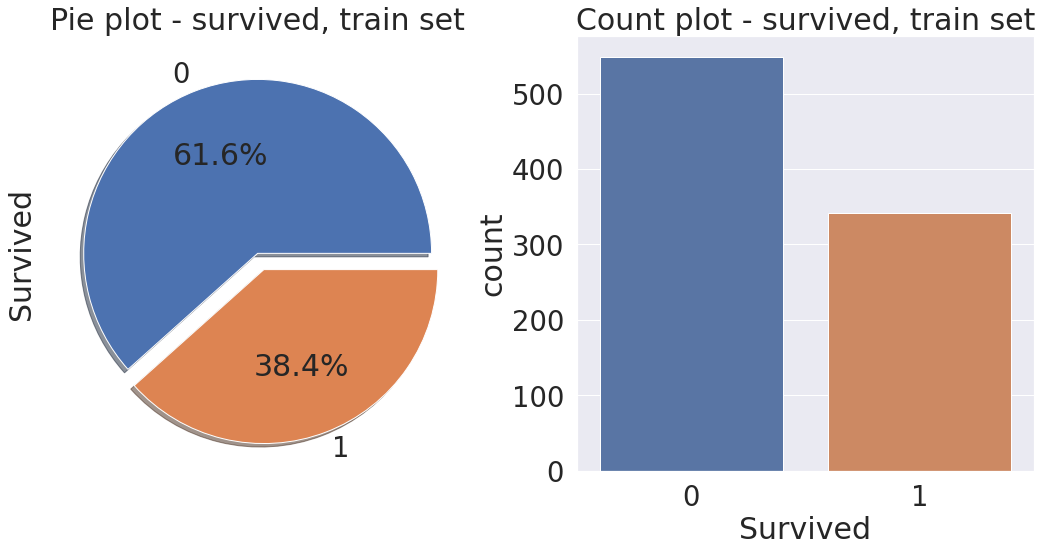

In [116]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%', ax = ax[0], shadow = True)
sns.countplot('Survived', data=df_train, ax = ax[1])
ax[0].set_title('Pie plot - survived, train set')
ax[1].set_title('Count plot - survived, train set')
plt.show()


대략 분포가 5 대 3이므로, 제법 균일하다. 불균일하지 않다면, 예를 들어 99 대 1이라면, 모델이 모든 것이 0이라 하면 정확도가 99%나 나오기 때문이다. 이럴 경우, 다른 접근방법을 사용해야할 것이다.

### 1.4 Pclass
Pclass 는 [순서](http://blog.heartcount.io/dd)자료 (ordinal data)이다.
  * 순서가 있고, Category 화 되어있는 자료를 의미한다.
  
먼저 Pclass 의 카테고리 별로 생존률 차이를 살펴보자


In [60]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [64]:
# 위와 동일한 작업을 crosstab으로 할 수 있습니다.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [66]:
# mean 은 생존률을 구할 수 있다.
df_train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


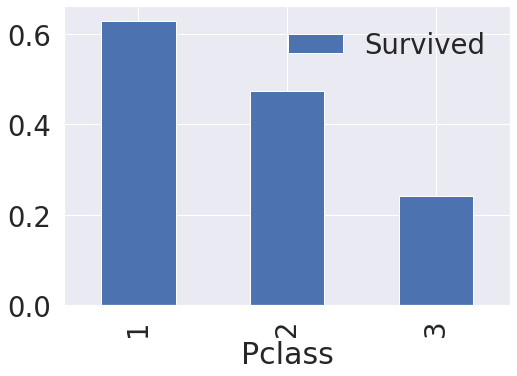

In [71]:
# Visualize it
df_train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()
plt.show()

P class 에따라 생존률이 많이 다름을 알 수 있다. 이를 통해, 나중에 Pclass 는 효과적인 feature 가 될 수 있음을 알 수 있다.

### 1.5 Sex

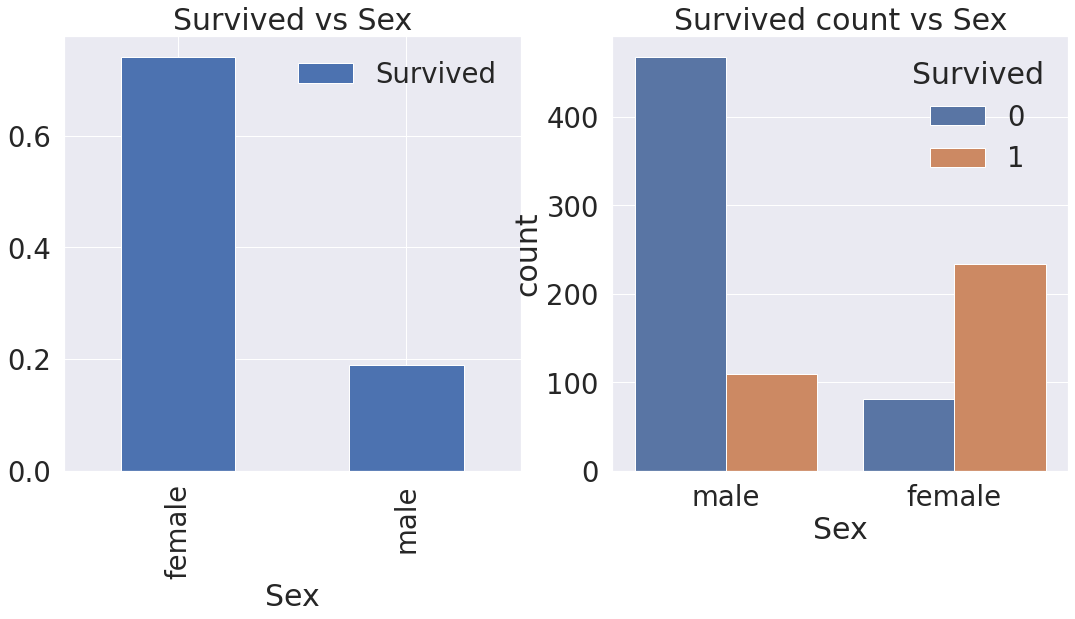

In [78]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue = 'Survived', data=df_train, ax= ax[1]) #hue 는 세부 집단을 그릴 수 있게 한다
ax[1].set_title('Survived count vs Sex')
plt.show()

여자가 생존 확률이 높습니다.
마찬가지로 이는 중요한 feature 로 사용될 것 입니다.

### 1.6 Sex and Pclass
이번에는 Sex와 Pclass를 두가지 동시에 고려하여 생존이 어떻게 달라지는지 확인해보자

참고로 [factorplot](https://stackoverflow.com/questions/30771864/what-do-the-vertical-lines-represent-in-seaborn-bar-charts/30772003#30772003)의 세로 줄은 errorbar이다.

>By default the height of the bars/points shows the mean and 95% confidence interval


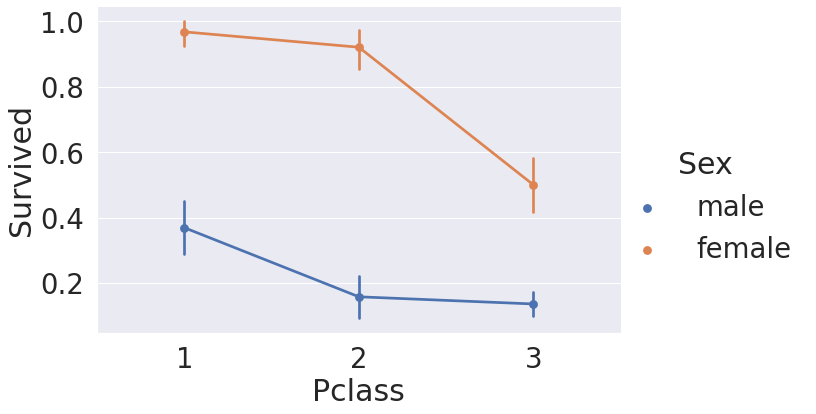

In [90]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train, size = 6, aspect = 1.5)
plt.show()

모든 Pclass에서 female이 male 보다 높은 생존률을 가지고 있음을 확인할 수 있다

### 1.7 Age

이번엔 나이에 따라 분석을 해보자

In [94]:
print(df_train['Age'].max())
print(df_train['Age'].min())
print(df_train['Age'].mean())

80.0
0.42
29.69911764705882


가장 나이 많은 사람은 80 살, 어린 사람은 0.42, 평균은 29.69살임을 알 수 있다.
또한 Titanic data set 에서 Age는 [Ratio data set](https://www.questionpro.com/blog/ratio-data/) 임을 알 수 있다.

Age의 Histogram 을 그리는 대신 KDE (Kernel Density Estimation)을 이용하여 그래프를 그려보겠다. KDE 는 쉽게 말해서 Histogram을 Kernel 함수를 이용하여 연속적으로 그리는 그래프이다. 자세한 KDE 는 [여기](https://www.questionpro.com/blog/ratio-data/) 를 참조하길 바란다. Seaborn 은 이를 구현할 수 있는 라이브러리 함수를 가지고 있다.


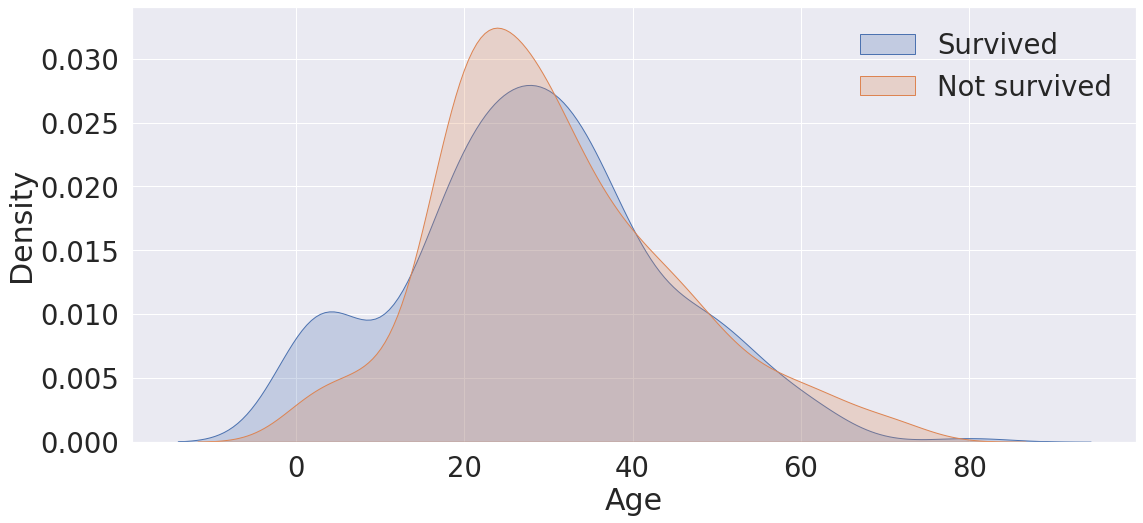

In [108]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], shade=True, ax = ax, label = 'Survived')
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], shade=True, ax = ax, label = 'Not survived')
ax.legend()
plt.show()

이를 보면 어린 나이가 좀 더 생존률이 높음을 알 수 있다.

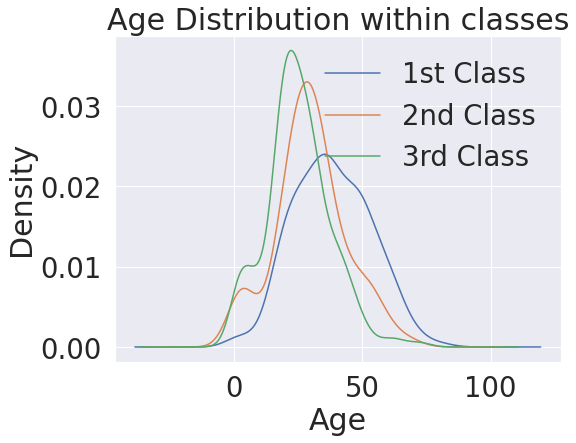

In [114]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

Class 에 따른 나이의 분포를 보면, 높은 클래스일수록 나이가 많음을 알 수 있다.